#                  Marketing Campaigns

#Problem scenario:

Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

# Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

#Data description:
The dataset aligns with the Four Ps of Marketing, categorizing variables to analyze consumer behavior. Product-related variables track spending across categories, while Price factors like income and deal-based purchases indicate affordability. Place covers shopping channels and web visits, reflecting purchase preferences. Promotion measures campaign engagement, complaints, and recency. Additionally, demographics support segmentation for personalized marketing. This structured approach helps businesses optimize products, pricing, distribution, and promotions for better customer engagement and market performance.


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
marketing = pd.read_csv('marketing_data.csv')
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [163]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

#Step 1.
After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.

In [164]:
# Renaming the column and removing extra space

marketing = marketing.rename(columns={' Income ': 'Income'})

In [165]:
# Convert Dt_Customer to datetime

marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'])

<ipython-input-165-ba13a743c46d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'])


#Step 2.

There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.

In [166]:
# Scrutinize the Education Status Categories

marketing['Education'] = marketing['Education'].str.replace('2n Cycle', 'Master')
marketing['Education'].value_counts()

,count
Education,
Graduation,1127
Master,573
PhD,486
Basic,54


In [167]:
# Scrutinize Marital Status Categories

marketing['Marital_Status'] = marketing['Marital_Status'].str.replace('Together', 'Married')
marketing['Marital_Status'] = marketing['Marital_Status'].str.replace('Absurd', 'Single')
marketing['Marital_Status'] = marketing['Marital_Status'].str.replace('YOLO', 'Single')
marketing['Marital_Status'] = marketing['Marital_Status'].str.replace('Alone', 'Single')
marketing['Marital_Status'].value_counts()

,count
Marital_Status,
Married,1444
Single,487
Divorced,232
Widow,77


In [168]:
# Checking the null values

null_income = marketing[marketing['Income'].isnull()]
#print(f"{null_income} null values in Income column.")
null_income

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Married,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,Master,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Married,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,Master,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Married,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [169]:
# Split the $ from the Income and remove the comma

marketing['Income'] = marketing['Income'].str.replace('$', '').str.replace(',', '').astype(float)


In [170]:
# Check for Missing Income using independent variables Education & Marital_Status

group_cols = ['Education', 'Marital_Status']

group_independent_variable_median = marketing.groupby(group_cols)['Income'].median()
group_independent_variable_mean = marketing.groupby(group_cols)['Income'].mean()

print("Median Income depending on the independent variable: ", "\n",group_independent_variable_median.sum(),"\n")
print("Mean Income depending on the independent variable", "\n",group_independent_variable_mean.sum())

Median Income depending on the independent variable:  
 700330.0 

Mean Income depending on the independent variable 
 719109.8268381215


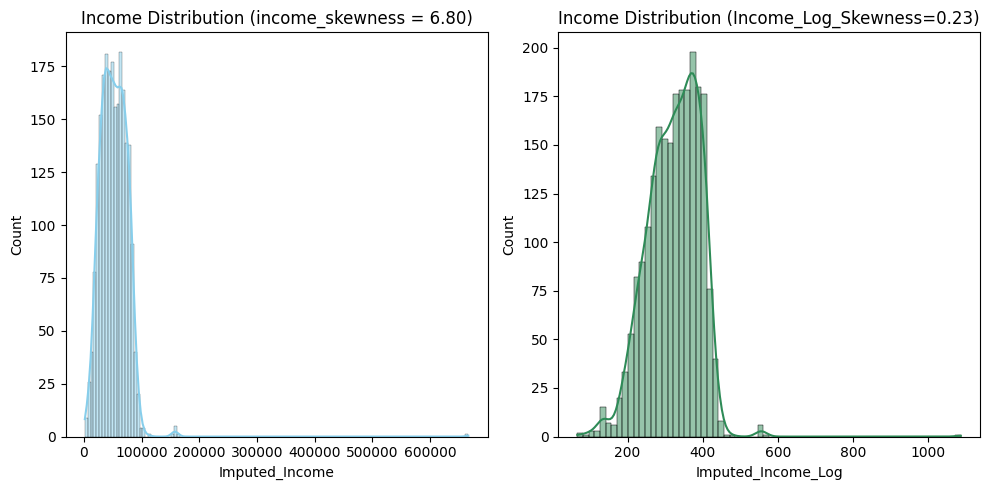

In [171]:
# Data Imputation for Income using Median

marketing['Imputed_Income'] = marketing.groupby(group_cols)['Income'].transform(lambda x: x.fillna(x.median()))

# Plot the income distribution using different transformation technique

from scipy import stats

income_skewness = marketing['Imputed_Income'].skew()
income_kurtosis = marketing['Imputed_Income'].kurtosis()

Imputed_income_log, lambda_optimal = stats.boxcox(marketing['Imputed_Income'])

marketing['Imputed_Income_Log'] = Imputed_income_log

Income_Log_Skewness = marketing['Imputed_Income_Log'].skew()
Income_Log_Kurtosis = marketing['Imputed_Income_Log'].kurtosis()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

sns.histplot(marketing['Imputed_Income'], color='skyblue', kde=True)
plt.title(f"Income Distribution (income_skewness = {income_skewness:.2f})")

plt.subplot(1, 2, 2)
sns.histplot(marketing['Imputed_Income_Log'], color='seagreen', kde=True)
plt.title(f"Income Distribution (Income_Log_Skewness={Income_Log_Skewness:.2f})")

plt.tight_layout()
plt.show()

# Step 3.	Create variables to represent the total number of children, age, and total spending.

a.	Derive the total purchases from the number of transactions across the three channels.


In [172]:
# Adding Kidhome and Teenhome Columns

marketing['Total Children'] = marketing['Kidhome'] + marketing['Teenhome']
marketing['Total Amount Spent on Purchase'] = marketing['MntWines'] + marketing['MntFruits'] + marketing['MntMeatProducts'] + marketing['MntFishProducts'] + marketing['MntSweetProducts'] + marketing['MntGoldProds']

# Step 4.
Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

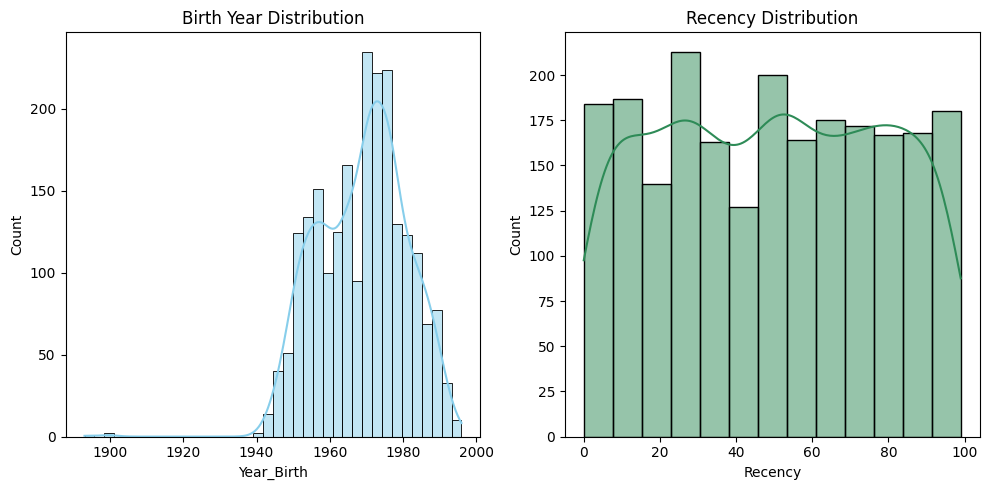

In [173]:
# Check for the Birth Year and Recenecy Distribution

plt.figure(figsize=( 10, 5))
plt.subplot(1, 2, 1)
sns.histplot(marketing['Year_Birth'], color='skyblue', kde=True)
plt.title('Birth Year Distribution')

plt.subplot(1, 2, 2)
sns.histplot(marketing['Recency'], color='seagreen', kde=True)
plt.title('Recency Distribution')

plt.tight_layout()
plt.show()

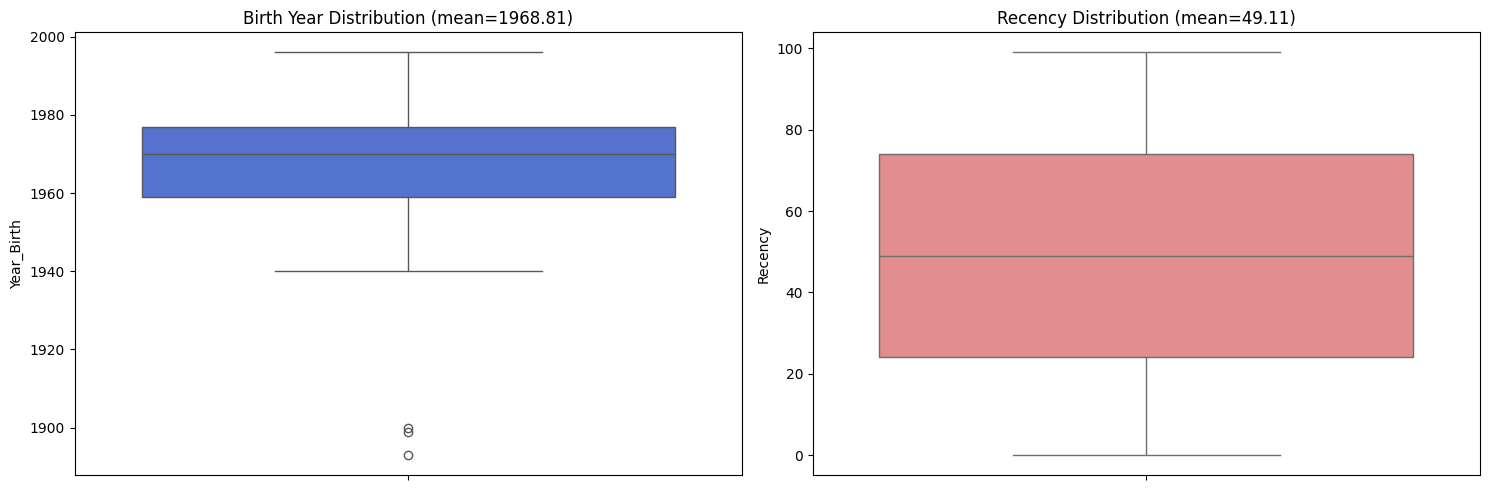

In [174]:
# Check for the Birth Year and Recenecy Outliers

birth_median = marketing['Year_Birth'].median()
birth_mean = marketing['Year_Birth'].mean()

recency_median = marketing['Recency'].median()
recency_mean = marketing['Recency'].mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(marketing['Year_Birth'], color='royalblue')
plt.title(f'Birth Year Distribution (mean={birth_mean:.2f})')

plt.subplot(1, 2, 2)
sns.boxplot(marketing['Recency'], color='lightcoral')
plt.title(f'Recency Distribution (mean={recency_mean:.2f})')

plt.tight_layout()
plt.show()

In [175]:
#marketing['Year_Birth'].unique()
m_n = marketing['Year_Birth'].min()
m_m = marketing['Year_Birth'].max()
print(m_n)
print(m_m)

1893
1996


In [176]:
# Check the purchase date of customers born before 1925

before_1925 = marketing[marketing['Year_Birth'] < 1925]

purchase_date_before_1925 = before_1925['Dt_Customer']

before_1925_count = len(before_1925)

print(f"Number of customers born before 1925: {before_1925_count}")
print("\nFull data for customers born before 1925:")
print(before_1925)

Number of customers born before 1925: 3

Full data for customers born before 1925:
         ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
513   11004        1893    Master         Single  60182.0        0         1   
827    1150        1899       PhD        Married  83532.0        0         0   
2233   7829        1900    Master       Divorced  36640.0        1         0   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
513   2014-05-17       23         8  ...             0             0   
827   2013-09-26       36       755  ...             1             0   
2233  2013-09-26       99        15  ...             0             0   

      AcceptedCmp2  Response  Complain  Country  Imputed_Income  \
513              0         0         0       SA         60182.0   
827              0         0         0       SP         83532.0   
2233             0         0         1      IND         36640.0   

      Imputed_Income_Log  Total Childr

In [177]:
# Set Year_Birth to NaN for customers born before 1925

#marketing.loc[marketing['Year_Birth'] < 1925, 'Year_Birth'] = pd.NA

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2240 non-null   int64         
 1   Year_Birth                      2240 non-null   int64         
 2   Education                       2240 non-null   object        
 3   Marital_Status                  2240 non-null   object        
 4   Income                          2216 non-null   float64       
 5   Kidhome                         2240 non-null   int64         
 6   Teenhome                        2240 non-null   int64         
 7   Dt_Customer                     2240 non-null   datetime64[ns]
 8   Recency                         2240 non-null   int64         
 9   MntWines                        2240 non-null   int64         
 10  MntFruits                       2240 non-null   int64         
 11  MntM

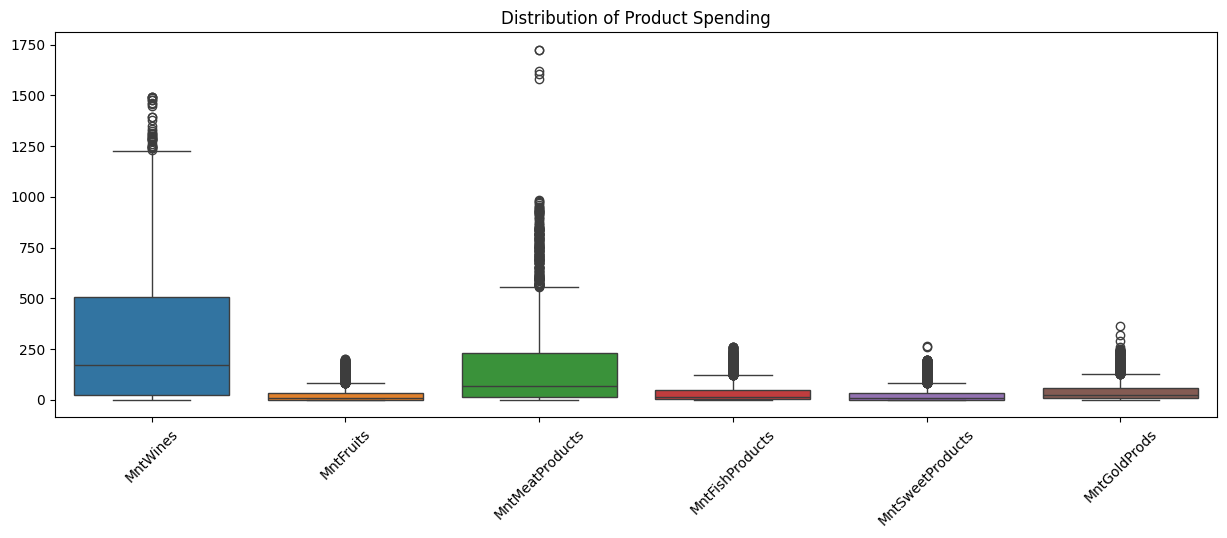

In [178]:
# Boxplot for vieweing the Outliers in Products

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(15, 5))
sns.boxplot(data=marketing[product_columns])
plt.title('Distribution of Product Spending')
plt.xticks(rotation=45)
plt.show()

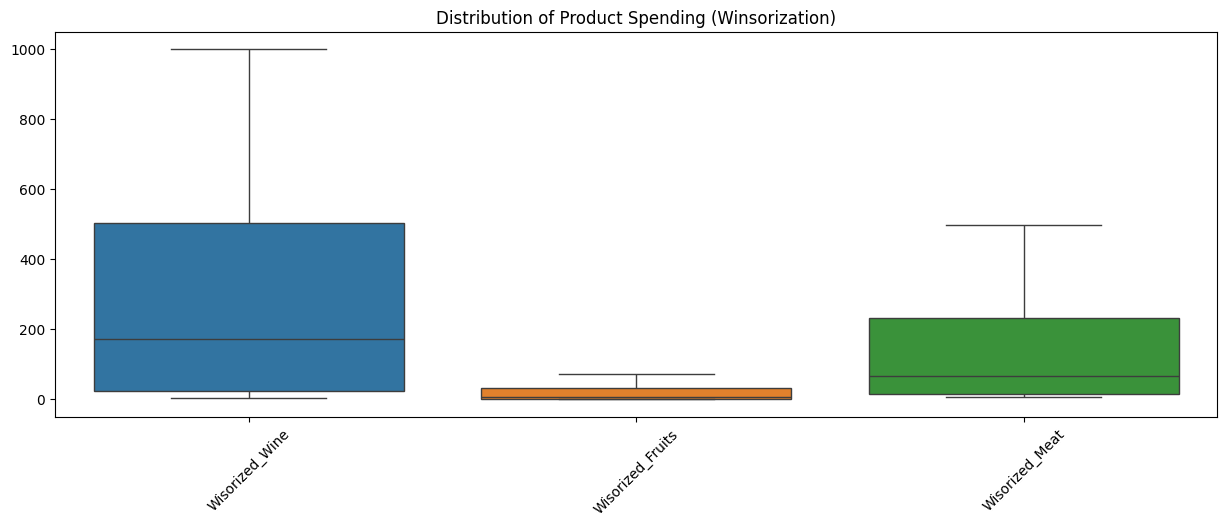

In [179]:
# Implement Winsorization to handle outliers in the Products

from scipy.stats.mstats import winsorize

marketing['Wisorized_Wine'] = winsorize(marketing['MntWines'], limits=[0.05, 0.05])
marketing['Wisorized_Fruits'] = winsorize(marketing['MntFruits'], limits=[0.12, 0.12])
marketing['Wisorized_Meat'] = winsorize(marketing['MntMeatProducts'], limits=[0.10, 0.10])


# Plot the Box to visualise the outliers in newly created Winsorized Columns

plt.figure(figsize=(15, 5))
sns.boxplot(data=marketing[['Wisorized_Wine', 'Wisorized_Fruits', 'Wisorized_Meat']])
plt.title('Distribution of Product Spending (Winsorization)')
plt.xticks(rotation=45)
plt.show()

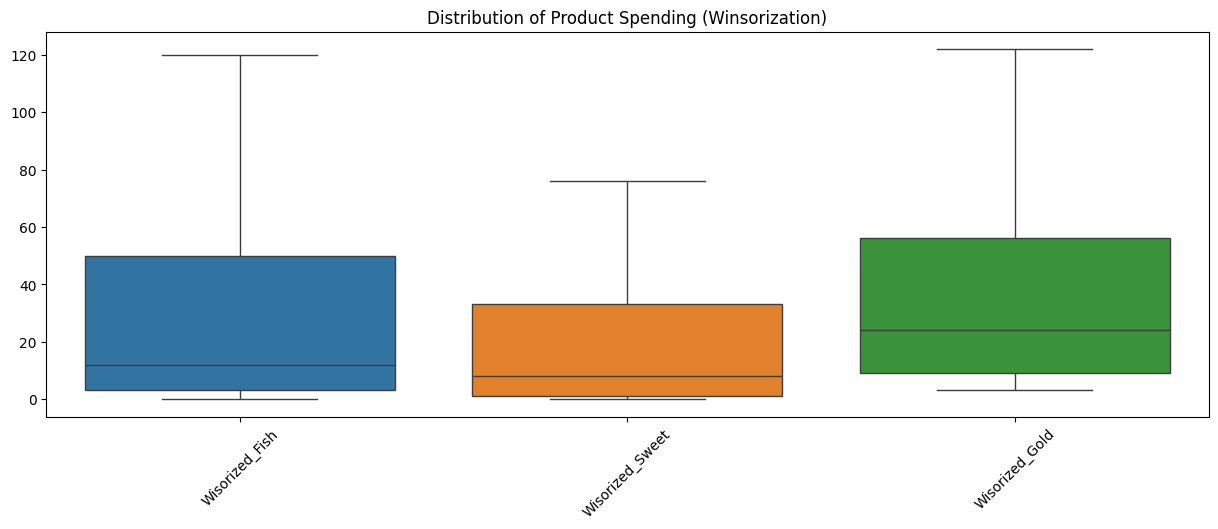

In [180]:
# Implement Winsorization to handle outliers in the Products

from scipy.stats.mstats import winsorize

marketing['Wisorized_Fish'] = winsorize(marketing['MntFishProducts'], limits=[0.10, 0.10])
marketing['Wisorized_Sweet'] = winsorize(marketing['MntSweetProducts'], limits=[0.12, 0.12])
marketing['Wisorized_Gold'] = winsorize(marketing['MntGoldProds'], limits=[0.10, 0.10])

# Plot the Box to visualise the outliers in newly created Winsorized Columns

plt.figure(figsize=(15, 5))
sns.boxplot(data=marketing[['Wisorized_Fish', 'Wisorized_Sweet', 'Wisorized_Gold']])
plt.title('Distribution of Product Spending (Winsorization)')
plt.xticks(rotation=45)
plt.show()

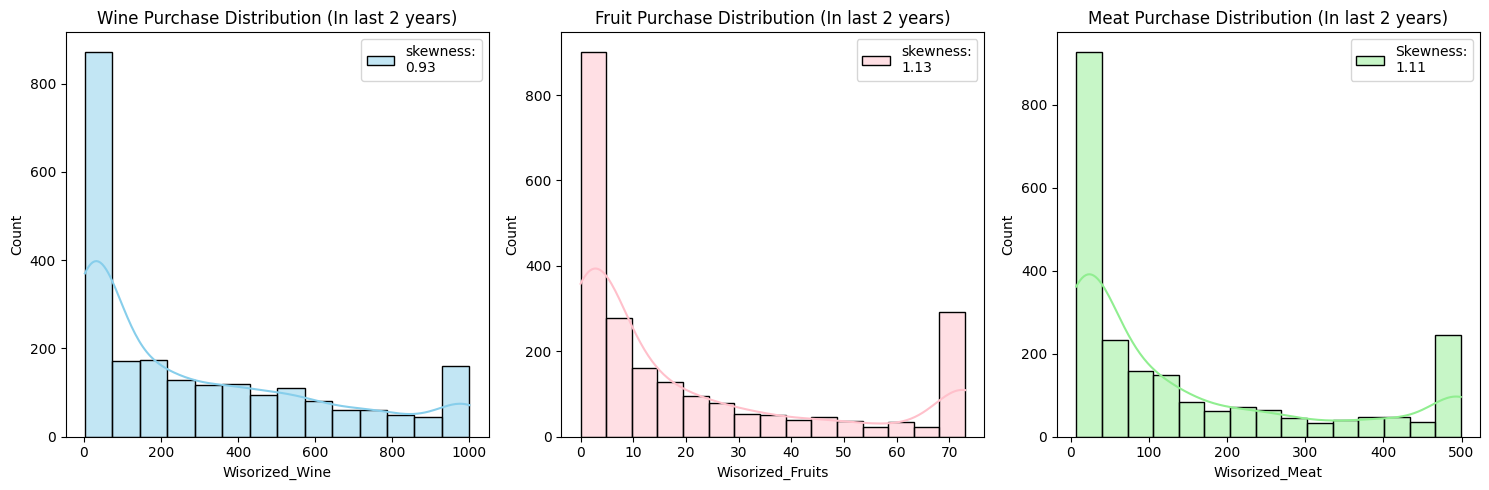

In [181]:
# Calculate Product's Skewness

wine_skew = marketing['Wisorized_Wine'].skew() #
fruits_skew = marketing['Wisorized_Fruits'].skew()
meat_skew = marketing['Wisorized_Meat'].skew()

# Visualisation Product's Distribution

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

sns.histplot(marketing['Wisorized_Wine'], color='skyblue', kde=True, label=f"skewness:\n{wine_skew:.2f}")
plt.title('Wine Purchase Distribution (In last 2 years)')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(marketing['Wisorized_Fruits'], color='pink', kde=True, label=f"skewness:\n{fruits_skew:.2f}")
plt.title('Fruit Purchase Distribution (In last 2 years)')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(marketing['Wisorized_Meat'], color='lightgreen', kde=True, label=f"Skewness:\n{meat_skew:.2f}")
plt.title('Meat Purchase Distribution (In last 2 years)')

plt.tight_layout()
plt.legend()
plt.show()


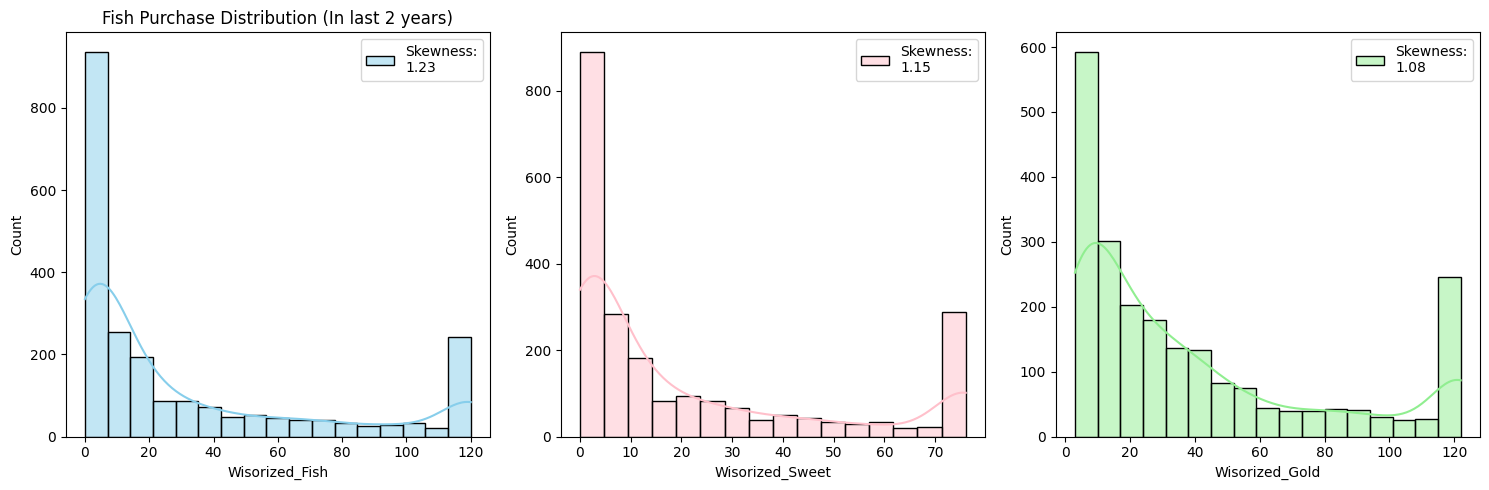

In [182]:
# Calculate Product's Skewness

fish_skew = marketing['Wisorized_Fish'].skew()
sweet_skew = marketing['Wisorized_Sweet'].skew()
gold_skew = marketing['Wisorized_Gold'].skew()

# Visualise Product's Distribution

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(marketing['Wisorized_Fish'], color='skyblue', kde=True, label=f"Skewness:\n{fish_skew:.2f}")
plt.title('Fish Purchase Distribution (In last 2 years)')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(marketing['Wisorized_Sweet'], color='pink', kde=True, label=f"Skewness:\n{sweet_skew:.2f}")
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(marketing['Wisorized_Gold'], color='lightgreen', kde=True, label=f"Skewness:\n{gold_skew:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

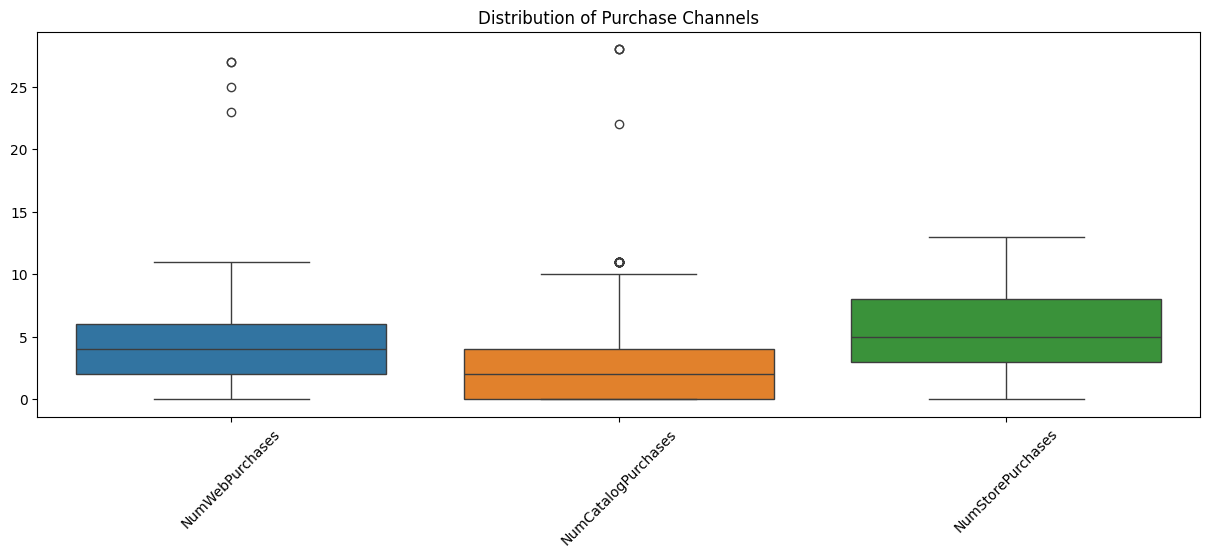

In [183]:
# Plot the box for identifying the outliers in Purchase Channel

channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(15, 5))
sns.boxplot(data=marketing[channel_columns])
plt.title('Distribution of Purchase Channels')
plt.xticks(rotation=45)
plt.show()

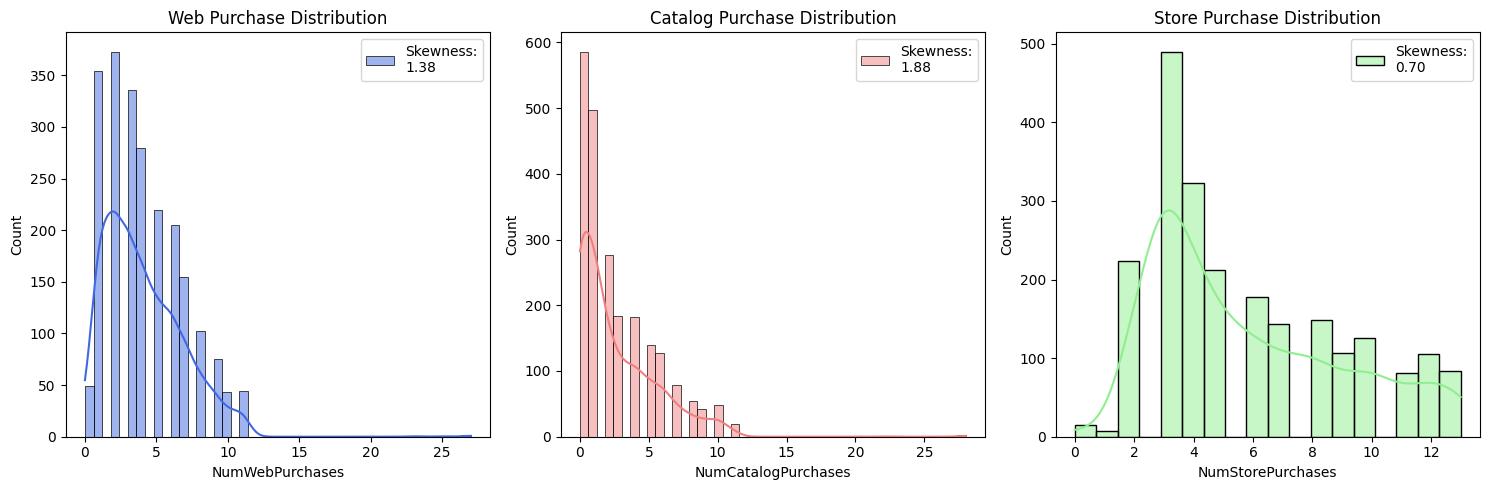

In [184]:
# Plot the Skewness and Distribution of the Purchase Channels

web_skew = marketing['NumWebPurchases'].skew()
catalog_skew = marketing['NumCatalogPurchases'].skew()
store_skew = marketing['NumStorePurchases'].skew()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(marketing['NumWebPurchases'], color='royalblue', kde=True, label=f"Skewness:\n{web_skew:.2f}")
plt.title('Web Purchase Distribution')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(marketing['NumCatalogPurchases'], color='lightcoral', kde=True, label=f"Skewness:\n{catalog_skew:.2f}")
plt.title('Catalog Purchase Distribution')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(marketing['NumStorePurchases'], color='lightgreen', kde=True, label=f"Skewness:\n{store_skew:.2f}")
plt.title('Store Purchase Distribution')
plt.legend()

plt.tight_layout()
plt.show()

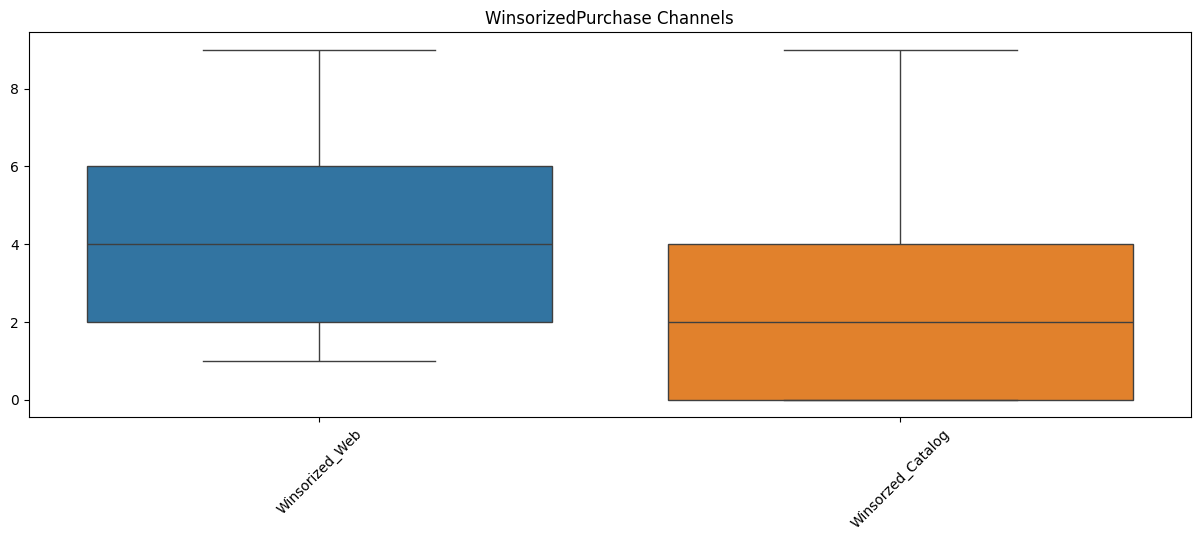

In [185]:
# Perform Winsorzation for Purchase Web and Catalog Channel

from scipy.stats.mstats import winsorize

marketing['Winsorized_Web'] = winsorize(marketing['NumWebPurchases'], limits=[0.05, 0.05])
marketing['Winsorzed_Catalog'] = winsorize(marketing['NumCatalogPurchases'], limits=[0.05, 0.05])

# Plot the Winsorized Purchase Channels

plt.figure(figsize=(15, 5))
sns.boxplot(data=marketing[['Winsorized_Web', 'Winsorzed_Catalog']])
plt.title('WinsorizedPurchase Channels')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Detect Outliers in KidHome and TeenHome

plt.figure(figsize=(15, 5))
sns.boxplot(data=marketing[['Kidhome', 'Teenhome']])
plt.title('Distribution of Kidhome and Teenhome')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate Skewness

web_visit_skew = marketing['NumWebVisitsMonth'].skew()

# Check Distribution for Monthly Web Visit

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(marketing['NumWebVisitsMonth'], color='seagreen', kde=True, label=f"Skewness={web_visit_skew:.2f}")
plt.title('Monthly Web Visit Distribution')
plt.legend()

# Detect outliers for NumWebVisitsMonth

plt.subplot(1, 2, 2)
sns.boxplot(data=marketing['NumWebVisitsMonth'], color='pink')
plt.title('Monthly Web Visit Distribution')
plt.show()

In [ ]:
# Winsorization of Monthly Web Visit to Handle the outliers

marketing['winsorized_web_visit'] = winsorize(marketing['NumWebVisitsMonth'], limits=[0.01, 0.01])

# Calculate winsorized skewness

winsorized_web_visit_skew = marketing['winsorized_web_visit'].skew()

# Plot the winsorized monthly web visit

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.boxplot(data=marketing['winsorized_web_visit'], color='yellow')
plt.title('Winsorized Monthly Web Visit Distribution')

plt.subplot(1, 2, 2)
sns.histplot(marketing['winsorized_web_visit'], color='royalblue', kde=True, label=f"Skewness={winsorized_web_visit_skew:.2f}")
plt.title('Winsorized Monthly Web Visit Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Calculate Skewness

deal_skew = marketing['NumDealsPurchases'].skew()

# Detect Outliers for Num Deal Purchases

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=marketing['NumDealsPurchases'], color='green')
plt.title('Distribution of Discount Purchases')

# Calculate the distrbution

plt.subplot(1, 2, 2)
sns.histplot(marketing['NumDealsPurchases'], color='darkred', kde=True, label=f"Skewness={deal_skew:.2f}")
plt.title('Distribution of Discount Purchases')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Winsorise the Num Deals Purchase column to handle outliers

marketing['Winsorized_Discount'] = winsorize(marketing['NumDealsPurchases'], limits=[0.05, 0.05])

# Plot the winsorized Discount column

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=marketing['Winsorized_Discount'], color='lightcoral')
plt.title('Winsorized Discount Purchase')

plt.subplot(1, 2, 2)
sns.histplot(marketing['Winsorized_Discount'], color='skyblue', kde=True)
plt.title('Winsorized Discount Purchase')

plt.tight_layout()
plt.show()

#Step 5.
Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [ ]:
view = marketing[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']]
view.head()

In [ ]:
marketing['Country'].nunique()

In [ ]:
# Since we have less than 10 unique countries, we will do one hot encoding for
# the Country column

# Import Tensorflow

import tensorflow as tf

# Extract unique countries from Country colums

unique_countries = marketing['Country'].unique().tolist()

# Convert the country values to tensor for string lookup to search

country_tensor = tf.constant(marketing['Country'].values)

# Set vocabulary variable for unique countries

vocabulary = unique_countries

# Create a string lookup layer with output mode as one-hot with OOV buckets=0

string_lookup = tf.keras.layers.StringLookup(
    vocabulary=vocabulary,
    output_mode='one_hot',
    num_oov_indices=0
    )

# Create the encoded countries passing the tensors to string lookup
encoded_countries = string_lookup(country_tensor)

# Add the one hot encoded column to marketing DF

df = pd.DataFrame(encoded_countries.numpy(), columns=[f"Country_{country}" for country in vocabulary])
marketing = pd.concat([marketing, df], axis=1)

In [ ]:
marketing['Education'].unique()

In [ ]:
# Label Encode Education using tensorflow for Ordinal Data

import tensorflow as tf

education_vocabulary = ['Basic', 'Graduation', 'Master', 'PhD']



string_lookup_ordinal = tf.keras.layers.StringLookup(
    vocabulary=education_vocabulary,
    output_mode='int'
)

education_tensor = tf.constant(marketing['Education'].values)

encoded_education = string_lookup_ordinal(education_tensor)

# We will convert the df to pandas series as it has only 1 column and index for
# categorical data which is 0, 1, 2, 3

df_1 = pd.Series(encoded_education.numpy(), name='Education_Encoded')
marketing = pd.concat([marketing, df_1], axis=1)

In [ ]:
# One Hot Encode the Marital Status

# Create unique Python list of Marital Status

unique_marital_status = marketing['Marital_Status'].unique().tolist()

# Create a tensor for the unique Marital Status

marital_status_tensor = tf.constant(marketing['Marital_Status'].values)

# Set the vocabulary for String Lookup

vocabulary = unique_marital_status

# Create a String Lookup

string_lookup = tf.keras.layers.StringLookup(
    vocabulary=vocabulary,
    output_mode='one_hot',
    num_oov_indices = 0
)

# Encode the tensor with string lookup

encoded_marital_status = string_lookup(marital_status_tensor)

# Integrate with Marketing DataFrame

df_2  = pd.DataFrame(encoded_marital_status.numpy(), columns=[f"Marital_Status_{marital_status}" for marital_status in vocabulary])
marketing = pd.concat([marketing, df_2], axis=1)

In [ ]:
marketing.head()

In [ ]:
# Checking for duplicate IDs in the dataset

unique_counts = marketing['ID'].nunique()
total_counts = len(marketing)
print(f"The total number of unique marketing IDs is: {unique_counts}")
print(f"The total number of marketing records is: {total_counts}")

In [ ]:
# Drop the columns which will not be used

#marketing = marketing.drop(columns=['MntWines', 'Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Kidhome',	'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Education', 'Marital_Status'], axis=1)

In [ ]:
# Bin the birth year

bins =[0, 1894, 1904, 1914, 1924, 1934, 1944, 1954, 1964, 1974, 1984, 1994, 2004, float('inf')]

labels = ['<1894' ,'1894-1903', '1904-1913', '1914-1923', '1924-1933', '1934-1943', '1944-1953', '1954-1963', '1964-1973', '1974-1983', '1984-1993', '1994-2003', '>2003']

marketing['Year_Birth_Bucket'] = pd.cut(marketing['Year_Birth'], bins=bins, labels=labels)


In [ ]:
marketing.head()

In [ ]:
view = marketing['Year_Birth']
v = view.sort_values()
v

In [ ]:
marketing.info()

In [ ]:
cleaned_marketing_filepath = 'cleaned_marketing.csv'
marketing.to_csv(cleaned_marketing_filepath, index=False)
print(f"DataFrame saved to: {cleaned_marketing_filepath}")

In [ ]:
Cleaned_Marketing = pd.read_csv('/content/cleaned_marketing.csv')
Cleaned_Marketing.head()

# 6. Generate a heatmap to illustrate the correlation between different pairs of variables.



In [ ]:
# Heatmap with Total Purchases and Countries

Counrtywise_Shopping = Cleaned_Marketing[['Total Amount Spent on Purchase', 'Country_SP', 'Country_US', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_AUS', 'Country_SA']]

correlation_matrix = Counrtywise_Shopping.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Between Shopping and Resident')
plt.show()

In [ ]:
# Correlation between Web Visits and Web Purchases

Web_Purchases = Cleaned_Marketing[['NumWebVisitsMonth', 'NumWebPurchases']]

correlation_matrix = Web_Purchases.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Between Web Purchases and Web Visits')
plt.show()



In [ ]:
# Running and plotting a Pearson's R Coefficient test to check any correlation
# between Total NUmber of Children and the sweet's purchased

def pearson_r(n, x, y):
  numerator = n * np.sum(x * y) - np.sum(x) * np.sum(y)
  denominator = np.sqrt((n * np.sum(x ** 2) - np.sum(x)**2) * (n * np.sum(y ** 2) - np.sum(y) ** 2))
  r = numerator / denominator
  return r

n = len(Cleaned_Marketing)
x = Cleaned_Marketing['Total Children']
y = Cleaned_Marketing['MntSweetProducts']
correlation_coefficient = pearson_r(n, x, y)
print(f"Pearson's R Correlation {correlation_coefficient:.4f}")



In [ ]:
# Chi Square, a continuous probablity distribution between Education Level &
# Countries

import pandas as pd
from scipy.stats import chi2_contingency


def chi_square_test(data, column1, column2, alpha=0.05):
  if column1 not in data.columns or column2 not in data.columns:
    raise ValueError(f"One or both of the columns: '{column1}', '{column2}' do not exist in the dataframe")

  # Create a contigency table

  contingency_table = pd.crosstab(data[column1], data[column2])

  chi_square_statistic, p_value, dof, expected_values = stats.chi2_contingency(contingency_table)

  critical_value = stats.chi2.ppf(q=1-alpha, df=dof)


  print("Chi-Square Statistic: ", chi_square_statistic)
  print("Critical Value: ", critical_value)
  print("p-value: ", p_value)

  print(f"\nChi-square statistic: {chi_square_statistic:.4f}")

  if chi_square_statistic >= critical_value:
        print(f"Reject H_0, There is a significant relationship between {column1} and {column2}")
  else:
        print(f"Retain H_0, There is no significant relationship between {column1} and {column2}")

  if p_value <= alpha:
        print(f"Reject H_0, There is a significant relationship between {column1} and {column2}")
  else:
        print(f"Retain H_0, There is no significant relationship between {column1} and {column2}")
  print("-" * 100)

  return chi_square_statistic, critical_value, p_value

print("SP")
SP = chi_square_test(data=Cleaned_Marketing, column1='Country_SP', column2='Education_Encoded')
print("US")
US = chi_square_test(data=Cleaned_Marketing, column1='Country_US', column2='Education_Encoded')
print("CAN")
CA = chi_square_test(data=Cleaned_Marketing, column1='Country_CA', column2='Education_Encoded')
print("GER")
GER = chi_square_test(data=Cleaned_Marketing, column1='Country_GER', column2='Education_Encoded')
print("IND")
IND = chi_square_test(data=Cleaned_Marketing, column1='Country_IND', column2='Education_Encoded')
print("ME")
ME = chi_square_test(data=Cleaned_Marketing, column1='Country_ME', column2='Education_Encoded')
print("AUS")
AUS = chi_square_test(data=Cleaned_Marketing, column1='Country_AUS', column2='Education_Encoded')
print("SA")
SA = chi_square_test(data=Cleaned_Marketing, column1='Country_SA', column2='Education_Encoded')


#7.	Test the following hypotheses:

Older individuals may not possess the same level of technological proficiency
and may, therefore, lean toward traditional in-store shopping preferences.

In [ ]:
# One Way Anova

df_3 = Cleaned_Marketing[['NumStorePurchases', 'Year_Birth']]

groups = pd.unique(df_3['Year_Birth'])

data_by_group = {grp:df_3['NumStorePurchases'][df_3['Year_Birth'] == grp] for grp in groups}

group_data = [data_by_group[grp] for grp in groups]

# Perform one way Anova
if len(group_data) >2:
  fvalue, pvalue = stats.f_oneway(*group_data)

  print("F-value:", fvalue)
  print("p-value for significance is:", pvalue)

  alpha = 0.05
  if pvalue < alpha:
      print("Reject null hypothesis: There is a significant difference in NumStorePurchases across different Year_Birth groups.")
  else:
      print("Accept null hypothesis: There is no significant difference in NumStorePurchases across different Year_Birth groups.")
else:
    print("Not enough groups to perform one-way ANOVA.")

#7.	Test the following hypotheses:

b.	Customers with children likely experience time constraints, making online shopping a more convenient option.


In [ ]:
Cleaned_Marketing['Children_Encoded'] = Cleaned_Marketing['Total Children'].apply(lambda x: 1 if x > 0 else 0)

# One way ANOVA Test to check the average of Store Purchases (Dependent Variable)
# for the customer from different age

import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd

def one_way_anova(data, dependent_variable, independent_variable1):
    if dependent_variable not in data.columns or independent_variable1 not in data.columns:
        raise ValueError(f"One or both of the columns: '{dependent_variable}', '{independent_variable1}' do not exist in the dataframe")

    model = smf.ols(f'{dependent_variable} ~ C({independent_variable1})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\n--- One-Way ANOVA Results ---")
    print(f"Dependent Variable: {dependent_variable}")
    print(f"Independent Variable: {independent_variable1}")
    print("-" * 60)
    print(anova_table)
    print("-" * 60)

    return anova_table

In [ ]:
# One way Anova test for Store Purchases based on Age and Total number of children

anova_results_store = one_way_anova(
    data=Cleaned_Marketing,
    dependent_variable='NumWebPurchases',
    independent_variable1='Children_Encoded'
)


anova_results_store = one_way_anova(
    data=Cleaned_Marketing,
    dependent_variable='NumStorePurchases',
    independent_variable1='Children_Encoded'
)

In [ ]:
import pandas as pd
import numpy as np

# Check the actual average values of the NumWebPurchases for the two groups
# defined by Children_Encoded One Way Anova

mean_children = Cleaned_Marketing[Cleaned_Marketing['Children_Encoded'] == 1]['NumWebPurchases'].mean()
mean_no_children = Cleaned_Marketing[Cleaned_Marketing['Children_Encoded'] == 0]['NumWebPurchases'].mean()

print(f"The average number of web purchases for customers with children is: {mean_children:.2f}")
print(f"The average number of web purchases for customers without children is: {mean_no_children:.2f}")

# Calculate the Magnitude of the between Web Purchases with children and
# without children

# Recalculate the Series (you had the means calculated correctly later)
web_purchases_children = Cleaned_Marketing[Cleaned_Marketing['Children_Encoded'] == 1]['NumWebPurchases']
web_purchases_no_children = Cleaned_Marketing[Cleaned_Marketing['Children_Encoded'] == 0]['NumWebPurchases']

# Calculate standard deviations
sd_children = web_purchases_children.std()
sd_no_children = web_purchases_no_children.std()

# Calculate sample sizes
n_children = len(web_purchases_children)
n_no_children = len(web_purchases_no_children)

# Calculate pooled standard deviation
pooled_sd = np.sqrt(((n_children - 1) * sd_children**2 + (n_no_children - 1) * sd_no_children**2) / (n_children + n_no_children - 2))

# Calculate Cohen's d
cohens_d = (mean_no_children - mean_children) / pooled_sd

print(f"Mean Web Purchases (No Children): {mean_no_children:.2f}")
print(f"Mean Web Purchases (With Children): {mean_children:.2f}")
print(f"Cohen's d: {cohens_d:.3f}")

if cohens_d < 0.2:
    print(f"Small effect on magnitude")
elif 0.2 <= cohens_d < 0.5:
    print(f"Medium effect on magnitude.")
elif cohens_d >= 0.5:
    print(f"Large effect on magnitude.")
else:
    raise ValueError(f"Incorrect Calculation.")


#7.	Test the following hypotheses:

c.	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [ ]:
# Calculate Pearson R to do the correlation analysis

from scipy.stats import pearsonr
import numpy as np

def pearson_r_with_pvalue(x, y):
    r, p = pearsonr(x, y)
    return r, p

n = len(Cleaned_Marketing)
x_web = Cleaned_Marketing['NumStorePurchases']
y_web = Cleaned_Marketing['NumWebPurchases']
r_web, p_value_web = pearson_r_with_pvalue(x_web, y_web)
print(f"Pearson R (Web): {r_web:.2f}, P-value: {p_value_web:.3f}")

x_catalog = Cleaned_Marketing['NumStorePurchases']
y_catalog = Cleaned_Marketing['NumCatalogPurchases']
r_catalog, p_value_catalog = pearson_r_with_pvalue(x_catalog, y_catalog)
print(f"Pearson R (Catalog): {r_catalog:.2f}, P-value: {p_value_catalog:.3f}")

alpha = 0.05

# Web Cannibalization
if r_web < 0 and p_value_web < alpha:
    print("Reject the null hypothesis: There is statistically significant evidence that Web purchases cannibalize physical store purchases.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant evidence that Web purchases cannibalize physical store purchases (or the relationship is not negative).")

# Catalog Cannibalization
if r_catalog < 0 and p_value_catalog < alpha:
    print("Reject the null hypothesis: There is statistically significant evidence that Catalog purchases cannibalize physical store purchases.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant evidence that Catalog purchases cannibalize physical store purchases (or the relationship is not negative).")

# 7.	Test the following hypotheses:
d.	Does the United States significantly outperform the rest of the world in total purchase volumes?

In [ ]:
# independent samples t-test
def two_sample_t_test(df, purchase_amount, country_col, alpha=0.05, alternative='greater'):

    if country_col not in df.columns or purchase_amount not in df.columns:
        raise ValueError(f"Columns '{country_col}' or '{purchase_amount}' do not exist in the dataframe")

    # Filter by purchase country

    US_Purchase_Vol = df[df['Country'] == 'US'][purchase_amount]
    Rest_of_World_Purchase_Vol = df[df['Country'] != 'US'][purchase_amount]

    # Calculate Mean

    US_Purchase_Vol_Mean =  US_Purchase_Vol.mean()
    Rest_of_World_Purchase_Vol_Mean = Rest_of_World_Purchase_Vol.mean()

    t_statistic, p_value = stats.ttest_ind(US_Purchase_Vol, Rest_of_World_Purchase_Vol, alternative=alternative)


    if p_value < alpha:
        print("Reject the Null Hypothesis: The United States significantly outperforms the rest of the world in total purchase volumes.")
    else:
        print("Fail to Reject the Null Hypothesis: There is not enough evidence to suggest that the United States significantly outperforms the rest of the world in total purchase volumes.")

    return t_statistic, p_value

two_sample_t_test(df=Cleaned_Marketing, purchase_amount='Total Amount Spent on Purchase', country_col='Country', alpha=0.05, alternative='greater')

#8.	Use appropriate visualization to help analyze the following:

a.	Identify the top-performing products and those with the lowest revenue.

In [ ]:
# Identify the top-performing products and those with the lowest revenue.

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Total_Revenue = Cleaned_Marketing[product_columns].sum()
print(f"Total Revenue\n{Total_Revenue}\n")

top_performing_products = Total_Revenue.sort_values(ascending=False)
print(f"Top Performing Products\n{top_performing_products}")

plt.figure(figsize=(10, 6))
plt.bar(top_performing_products.index, top_performing_products.values, color='skyblue')
plt.xlabel('Products')
plt.ylabel('Total Revenue ')
plt.title('Top Performing Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# b. Examine if there is a correlation between customers' age and the acceptance
# rate of the last campaign.

df_4 = Cleaned_Marketing[['Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']]

campaign_correlation = df_4.corr()

sns.heatmap(campaign_correlation, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Between Campaign Acceptance and Age')
plt.show()



In [ ]:
#c.	Determine the country with the highest number of customers who accepted the last campaign.

Accepted_Count = Cleaned_Marketing[Cleaned_Marketing['AcceptedCmp5'] == 1]

country_acceptance_counts =Accepted_Count.groupby('Country').size().reset_index(name='CustomerCount')

country_acceptance_counts = country_acceptance_counts.sort_values(by='CustomerCount', ascending=False)

print(f"The country with the highest number of customers who accepted the last campaign\n{country_acceptance_counts}")
colors = ['pink','seagreen','lightcoral', 'skyblue', 'lightgreen', 'orange', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(country_acceptance_counts['Country'], country_acceptance_counts['CustomerCount'], color=colors)
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()

In [ ]:
# d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Cleaned_Marketing, x='Total Children', y='Total Amount Spent on Purchase')
plt.xlabel('Total Children')
plt.ylabel('Total Amount Spent on Purchase')
plt.title('Relationship between Total Children and Total Amount Spent on Purchase')
plt.show()

In [ ]:
from datetime import datetime, timedelta
# e.	Analyze the educational background of customers who lodged complaints in the last two years.

lodged_complains = Cleaned_Marketing[Cleaned_Marketing['Complain'] == 1].copy()

if "Complain_Date" in lodged_complains.columns:
  two_years = datetime.now() - timedelta(days = 365 * 2)
  recent_complaint = lodged_complains[pd.to_datetime(lodged_complains['Complain_Date']) >= two_years]
else:
    recent_complaint = lodged_complains

education_level_counts = recent_complaint['Education'].value_counts()
colors = ['lightgreen', 'pink', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(education_level_counts.index, education_level_counts.values, color=colors)
plt.xlabel('Education Level')
plt.ylabel('Complains')
plt.show()

In [ ]:
 Cleaned_Marketing.info()